# Ex  Pandas


**Énoncé du problème :**

Vous disposez d'un jeu de données dans un fichier CSV nommé "sales_data.csv". Ce jeu de données contient des informations sur les transactions de vente, notamment les colonnes suivantes : `Date`, `Produit`, `Quantité`, `Prix` et `Client`.

Écrivez un programme Python à l'aide de Pandas pour effectuer les tâches suivantes :

1. Créez un jeu de données fictif dans un DataFrame Pandas.
2. Calculez le chiffre d'affaires total pour chaque catégorie de produit (somme de `Quantité` * `Prix` pour chaque produit).
3. Trouvez les 5 produits ayant généré le chiffre d'affaires le plus élevé.
4. Calculez le chiffre d'affaires total pour chaque mois et créez un nouveau DataFrame avec les colonnes `Mois` et `Chiffre d'affaires total`.
5. Tracez un diagramme en barres montrant le chiffre d'affaires total pour chaque mois.




**Solution:**

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import datetime

# 1. create a fake dataset

data = {
    'Date': [datetime.date(2023, random.randint(1, 12), random.randint(1, 28)) for _ in range(1000)],
    'Product': [f'Product_{random.randint(1, 10)}' for _ in range(1000)],
    'Quantity': [random.randint(1, 10) for _ in range(1000)],
    'Price': [random.uniform(10, 100) for _ in range(1000)],
    'Customer': [f'Customer_{random.randint(1, 100)}' for _ in range(1000)]
}

# Create a DataFrame
df = pd.DataFrame(data)
df

# Calculez le chiffre d'affaires total pour chaque catégorie de produit (somme de Quantité * Prix pour chaque produit).

# Save the DataFrame to a CSV file
# df.to_csv('sales_data.csv', index=False)


,Date,Product,Quantity,Price,Customer
0,2023-05-24,Product_10,5,91.448204,Customer_69
1,2023-08-11,Product_5,8,24.554508,Customer_50
2,2023-09-17,Product_10,6,29.150051,Customer_46
3,2023-08-11,Product_6,3,18.743583,Customer_54
4,2023-03-20,Product_5,1,30.581829,Customer_91
...,...,...,...,...,...
995,2023-01-20,Product_7,6,59.722312,Customer_88
996,2023-06-12,Product_2,5,76.249761,Customer_16
997,2023-11-08,Product_1,7,80.711902,Customer_45
998,2023-06-27,Product_6,10,10.594283,Customer_33


In [47]:
# 2. Calculate total sales revenue for each product category
df['Total Revenue'] = df['Quantity'] * df['Price']
df.head()

,Date,Product,Quantity,Price,Customer,Total Revenue
0,2023-05-24,Product_10,5,91.448204,Customer_69,457.241022
1,2023-08-11,Product_5,8,24.554508,Customer_50,196.436062
2,2023-09-17,Product_10,6,29.150051,Customer_46,174.900306
3,2023-08-11,Product_6,3,18.743583,Customer_54,56.230748
4,2023-03-20,Product_5,1,30.581829,Customer_91,30.581829


In [48]:
# 3. Find the top 5 products generating the highest revenue
product_revenue = df.groupby('Product')['Total Revenue'].sum().sort_values(ascending=False)
top_5_products = product_revenue.head(5)
top_5_products

Product
Product_7    34295.281910
Product_8    33989.293000
Product_9    32905.072984
Product_5    32480.414306
Product_4    32434.924401
Name: Total Revenue, dtype: float64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Quantity       1000 non-null   int64  
 3   Price          1000 non-null   float64
 4   Customer       1000 non-null   object 
 5   Total Revenue  1000 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


In [51]:
type(df['Date'].dt)

pandas.core.indexes.accessors.DatetimeProperties

In [50]:
# 4. Calculate total sales revenue for eachmonth and create a new DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_revenue = df.groupby('Month')['Total Revenue'].sum().reset_index()

df.head()

,Date,Product,Quantity,Price,Customer,Total Revenue,Month
0,2023-05-24,Product_10,5,91.448204,Customer_69,457.241022,5
1,2023-08-11,Product_5,8,24.554508,Customer_50,196.436062,8
2,2023-09-17,Product_10,6,29.150051,Customer_46,174.900306,9
3,2023-08-11,Product_6,3,18.743583,Customer_54,56.230748,8
4,2023-03-20,Product_5,1,30.581829,Customer_91,30.581829,3


In [10]:
monthly_revenue

,Month,Total Revenue
0,1,26364.606879
1,2,24101.008294
2,3,25819.896499
3,4,27282.823661
4,5,29278.657038
5,6,21801.360987
6,7,22402.882413
7,8,29480.018226
8,9,26395.587240
9,10,22623.271055


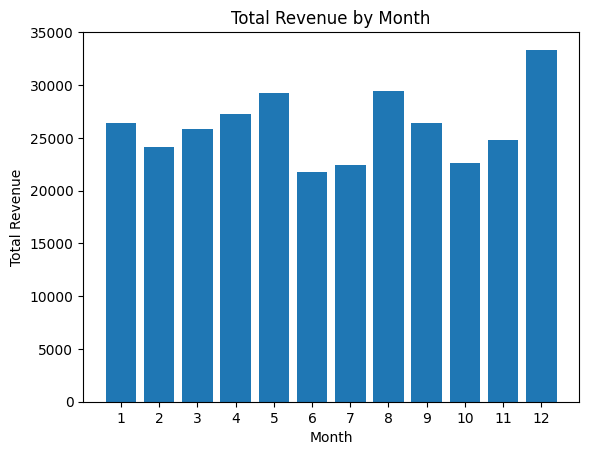

In [9]:
# 5. Plot a bar chart showing total revenue for each month
plt.bar(monthly_revenue['Month'], monthly_revenue['Total Revenue'])
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')
plt.xticks(range(1, 13))
plt.show()

In [11]:
# Print the results
print("Total Revenue by Product:")
print(product_revenue)

Total Revenue by Product:
Product
Product_3     36032.173631
Product_1     35889.040169
Product_7     33372.132401
Product_4     32830.879085
Product_10    28970.934105
Product_8     28927.939063
Product_9     28647.718970
Product_2     28235.740376
Product_6     24902.723156
Product_5     22979.900446
Name: Total Revenue, dtype: float64


In [12]:
print("\nTop 5 Products by Revenue:")
print(top_5_products)


Top 5 Products by Revenue:
Product
Product_3     36032.173631
Product_1     35889.040169
Product_7     33372.132401
Product_4     32830.879085
Product_10    28970.934105
Name: Total Revenue, dtype: float64


In [13]:
print("\nTotal Revenue by Month:")
print(monthly_revenue)


Total Revenue by Month:
    Month  Total Revenue
0       1   29053.620936
1       2   28350.293534
2       3   23465.405021
3       4   22479.869239
4       5   20285.013041
5       6   23755.004894
6       7   28250.883645
7       8   30579.482966
8       9   27249.728055
9      10   20537.290893
10     11   21647.847815
11     12   25134.741361
